In [2]:
import numpy as np
import scipy as sp
import pandas as pd
from pandas import DataFrame, Series

import matplotlib as mtl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

%precision 3

np.random.seed(0)

In [6]:
dice_data = np.array(list(range(1, 7)))
dice_data

array([1, 2, 3, 4, 5, 6])

In [5]:
np.random.choice(dice_data, 1)

array([6])

In [11]:
calc_steps = 1_000

dice_rolls = np.random.choice(dice_data, calc_steps)

for i in range(1, 7):
    p = len(dice_rolls[dice_rolls==i]) / calc_steps
    print('probability of {} : {}'.format(i, p))

probability of 1 : 0.195
probability of 2 : 0.166
probability of 3 : 0.157
probability of 4 : 0.142
probability of 5 : 0.167
probability of 6 : 0.173


In [12]:
type(dice_rolls)

numpy.ndarray

In [14]:
d = dice_data > 2
d

array([False, False,  True,  True,  True,  True])

In [15]:
dice_data[d]

array([3, 4, 5, 6])

In [16]:
d2 = np.where(dice_data > 2)
d2

(array([2, 3, 4, 5]),)

In [17]:
dice_data[d2]

array([3, 4, 5, 6])

In [22]:
a = np.arange(2, 5)
a

array([2, 3, 4])

In [24]:
coin_data = np.array([0, 1])

counts = np.random.choice(coin_data, 1000)

p_h = counts[counts==0].size / 1000
p_t = counts[counts==1].size / 1000

print('probability of head : ', p_h)
print('probability of tail : ', p_t)

probability of head :  0.497
probability of tail :  0.503


In [25]:
100 / 1000 * 99 / 999

0.010

In [26]:
0.99 * 0.1 / (0.99 * 0.1 + 0.03 * 0.9)

0.786

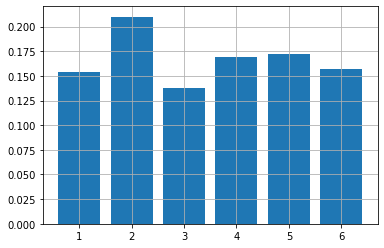

In [27]:
calc_steps = 1000

dice_rolls = np.random.choice(dice_data, calc_steps)

prob_data = np.array([])
for i in range(1, 7):
    p = dice_rolls[dice_rolls==i].size / calc_steps
    prob_data = np.append(prob_data, p)

plt.bar(dice_data, prob_data)
plt.grid(True)

probability of 0 : 0.625
probability of 1 : 0.375


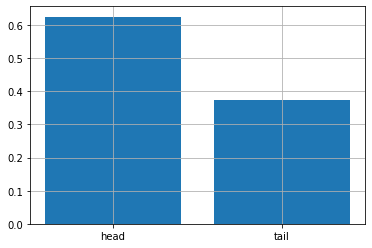

In [31]:
prob_be_data = np.array([])
coin_data = np.array([0, 0, 0, 0, 0, 1, 1, 1])

for i in np.unique(coin_data):
    p = coin_data[coin_data==i].size / coin_data.size
    print('probability of {} : {}'.format(i, p))
    prob_be_data = np.append(prob_be_data, p)

plt.bar([0, 1], prob_be_data, align='center')
plt.xticks([0, 1], ['head', 'tail'])
plt.grid(True)

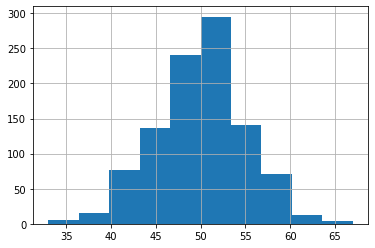

In [33]:
np.random.seed(0)
x = np.random.binomial(100, 0.5, 1000)
plt.hist(x)
plt.grid(True)

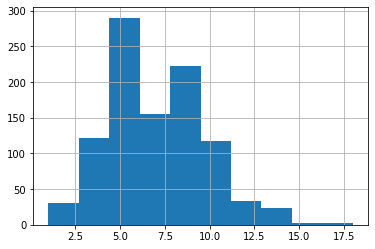

In [38]:
x = np.random.poisson(7, 1000)
plt.hist(x)
plt.grid(True)

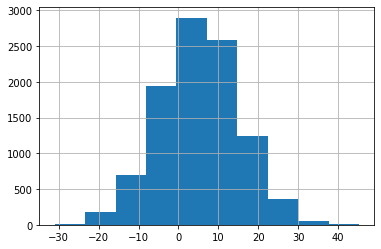

In [39]:
x = np.random.normal(5, 10, 10000)
plt.hist(x)
plt.grid(True)

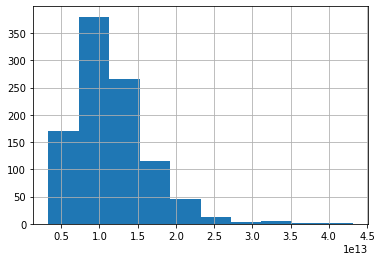

In [40]:
x = np.random.lognormal(30, 0.4, 1000)
plt.hist(x)
plt.grid(True)

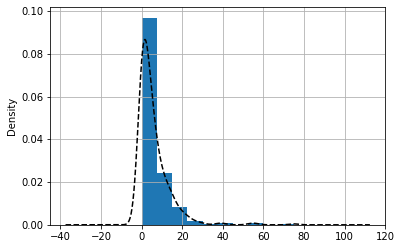

In [41]:
student_data_math = pd.read_csv('/Users/tsubasa/Jupyter/20190916_toudai/chap3/student-mat.csv', sep=';')

student_data_math.absences.plot(kind='kde', style='k--')
student_data_math.absences.hist(density=True)
plt.grid(True)

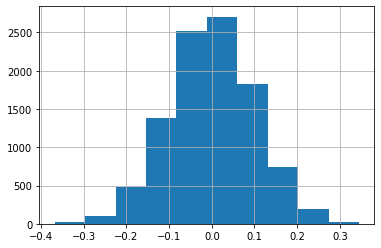

In [45]:
x = np.array([np.random.randn(100).mean() for x in range(10000)])
plt.hist(x)
plt.grid(True)

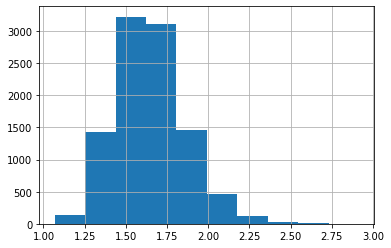

In [46]:
lx = np.array([np.random.lognormal(0, 1, 100).mean() for x in range(10000)])
plt.hist(lx)
plt.grid(True)

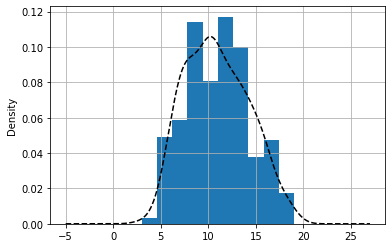

In [47]:
student_data_math.G1.plot(kind='kde', style='k--')
student_data_math.G1.hist(density=True)
plt.grid(True)

In [54]:
import scipy.stats as st
from scipy.stats import multivariate_normal
from mpl_toolkits.mplot3d import Axes3D

x, y = np.mgrid[10:100:2, 10:100:2]
pos = np.empty(x.shape + (2, ))

pos[:, :, 0] = x
pos[:, :, 1] = y

In [55]:
rv = multivariate_normal([50, 50], [[100, 0], [0, 100]])
z = rv.pdf(pos)

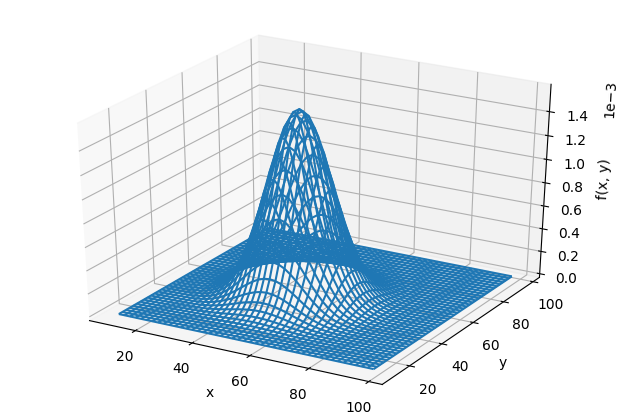

In [56]:
fig = plt.figure(dpi=100)

ax = Axes3D(fig)
ax.plot_wireframe(x, y, z)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')

ax.ticklabel_format(style='sci', axis='z', scilimits=(0, 0))

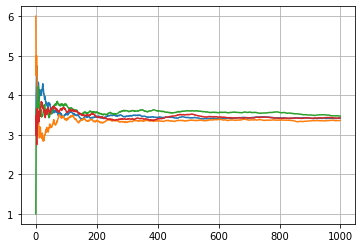

In [57]:
calc_times = 1000

sample_array = np.arange(1, 7)
number_cnt = np.arange(1, calc_times + 1)

for i in range(4):
    p = np.random.choice(sample_array, calc_times).cumsum()
    plt.plot(p / number_cnt)
    plt.grid(True)

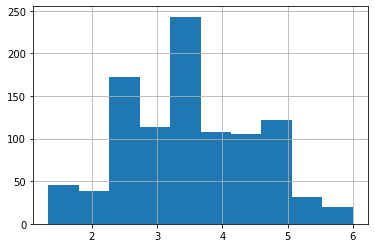

In [58]:
def function_central_theory(N):
    sample_array = np.arange(1, 7)
    number_cnt = np.arange(1, N + 1) * 1.0
    
    mean_array = np.array([])
    
    for i in range(1000):
        cum_variables = np.random.choice(sample_array, N).cumsum() * 1.0
        mean_array = np.append(mean_array, cum_variables[N - 1] / N)
    
    plt.hist(mean_array)
    plt.grid(True)

function_central_theory(3)

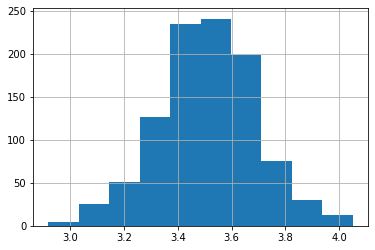

In [59]:
function_central_theory(100)

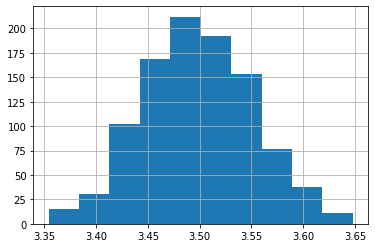

In [61]:
function_central_theory(1000)

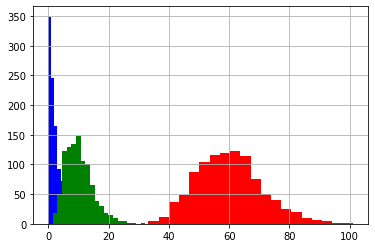

In [62]:
for df, c in zip([2, 10, 60], 'bgr'):
    x = np.random.chisquare(df, 1000)
    plt.hist(x, 20, color=c)
    plt.grid(True)

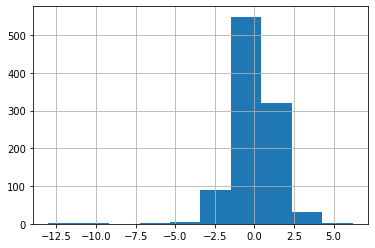

In [63]:
x = np.random.standard_t(5, 1000)
plt.hist(x)
plt.grid(True)

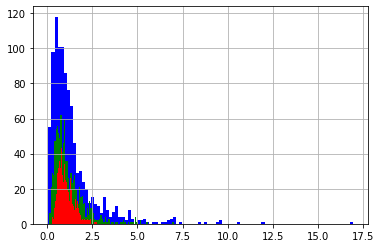

In [64]:
for df, c in zip([(6, 7), (10, 10), (20, 25)], 'bgr'):
    x = np.random.f(df[0], df[1], 1000)
    plt.hist(x, 100, color=c)
    plt.grid(True)

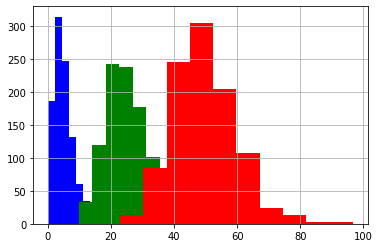

In [66]:
for df, c in zip([5, 25, 50], 'bgr'):
    x = np.random.chisquare(df, 1000)
    plt.hist(x, color=c)
    plt.grid(True)

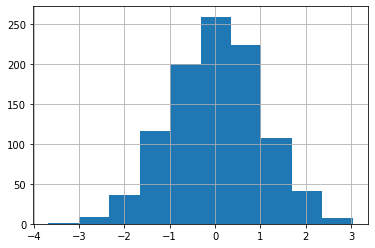

In [67]:
x = np.random.standard_t(100, 1000)
plt.hist(x)
plt.grid(True)

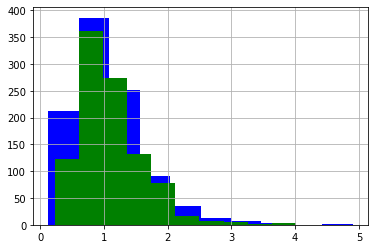

In [69]:
for df, c in zip([(10, 30), (20, 25)], 'bg'):
    x = np.random.f(df[0], df[1], 1000)
    plt.hist(x, color=c)
    plt.grid(True)

In [70]:
student_data_math = pd.read_csv('/Users/tsubasa/Jupyter/20190916_toudai/chap3/student-mat.csv', sep=';')
student_data_por = pd.read_csv('/Users/tsubasa/Jupyter/20190916_toudai/chap3/student-por.csv', sep=';')
student_data_merge = pd.merge(student_data_math, student_data_por, 
                             on=['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'nursery', 'internet'],
                             suffixes=('_math', '_por'))

print('G1 mean of math :', student_data_merge.G1_math.mean())
print('G2 mean of por :', student_data_merge.G1_por.mean())

G1 mean of math : 10.861256544502618
G2 mean of por : 12.112565445026178


In [71]:
from scipy import stats
t, p = stats.ttest_rel(student_data_merge.G1_math, student_data_merge.G1_por)
print('p-value :', p)

p-value : 1.6536555217100788e-16
